In [ ]:
# ## 1. Data Loading

import pandas as pd

# Download the dataset directly from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Shape:", df.shape)
df.head()

Shape: (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# ## 2. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


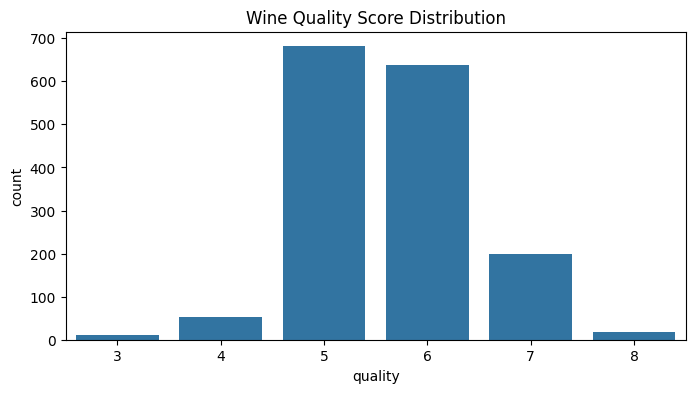

In [ ]:
# Distribution of quality scores
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Score Distribution")
plt.show()

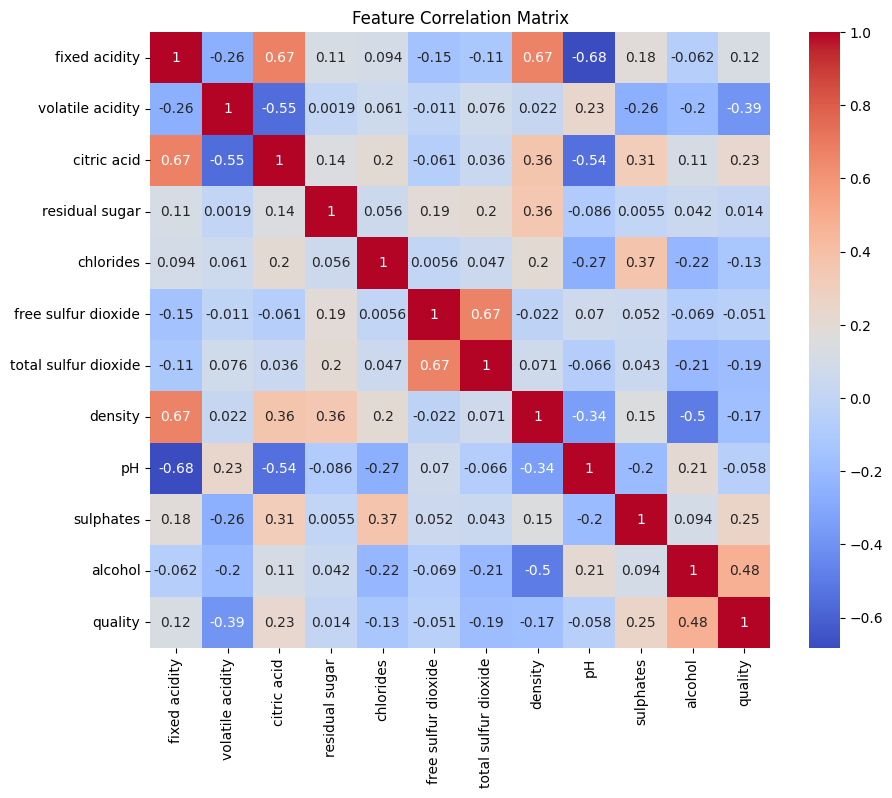

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# ## 3. Feature Engineering & Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert quality to binary classification: 1 if quality >= 7, else 0
df['good_quality'] = (df['quality'] >= 7).astype(int)

In [ ]:
# Features and target
X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ## 4. Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 8 features
selector = SelectKBest(score_func=f_classif, k=8)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

Selected features: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [ ]:
# ## 5. Model Training & Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train_sel, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict
y_pred = clf.predict(X_test_sel)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.94


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       277
           1       0.93      0.60      0.73        43

    accuracy                           0.94       320
   macro avg       0.94      0.80      0.85       320
weighted avg       0.94      0.94      0.94       320



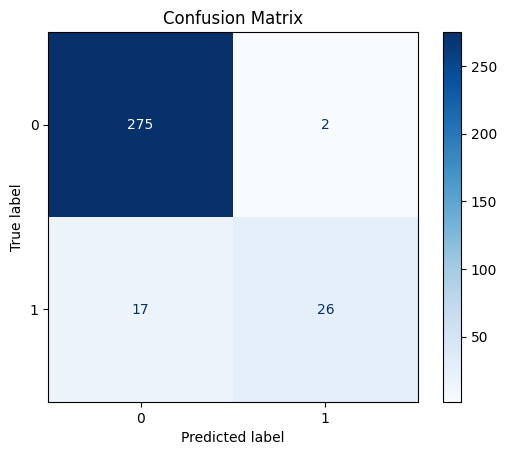

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

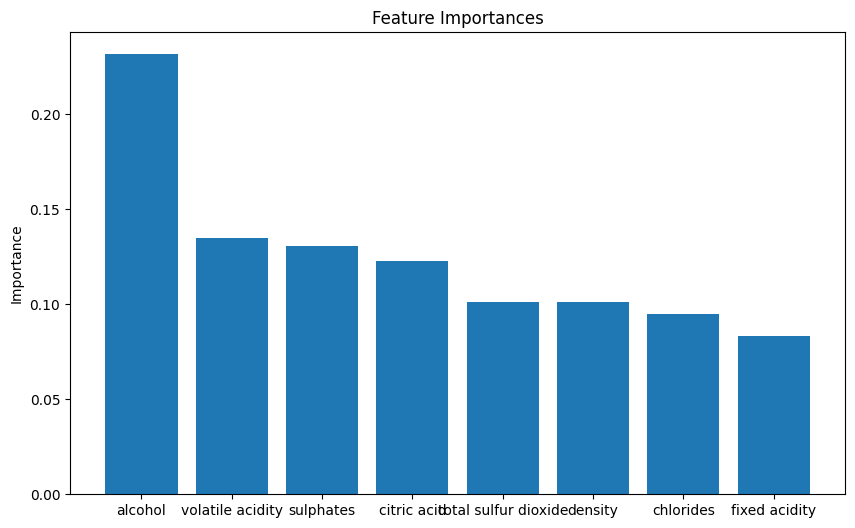


**Business Insights:**
- Alcohol, sulphates, and volatile acidity are key drivers of high-quality wine.
- Controlling alcohol content and sulphate levels can improve wine quality.
- The model helps prioritize quality control steps in wine production.



In [ ]:
# ## 6. Feature Importance & Business Insights

import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar([selected_features[i] for i in indices], importances[indices])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

print("""
**Business Insights:**
- Alcohol, sulphates, and volatile acidity are key drivers of high-quality wine.
- Controlling alcohol content and sulphate levels can improve wine quality.
- The model helps prioritize quality control steps in wine production.
""")